In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical, normalize
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [103]:
df_train = pd.read_csv('glass.csv')
print(f"O dataset contém {df_train.shape[0]} registros")
print(f"O dataset contém {df_train.shape[1]} features")

O dataset contém 214 registros
O dataset contém 10 features


In [104]:
df_train.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### Extrair a coluna Type para o conjunto de treinamento
#### Nesse caso X_train conterá o conjunto sem a coluna Type e Y_train conterá apenas a coluna Type

In [105]:
X_train = df_train.drop('Type', axis=1)
Y_train = df_train['Type']

#### Plotando o conjunto de treinamento

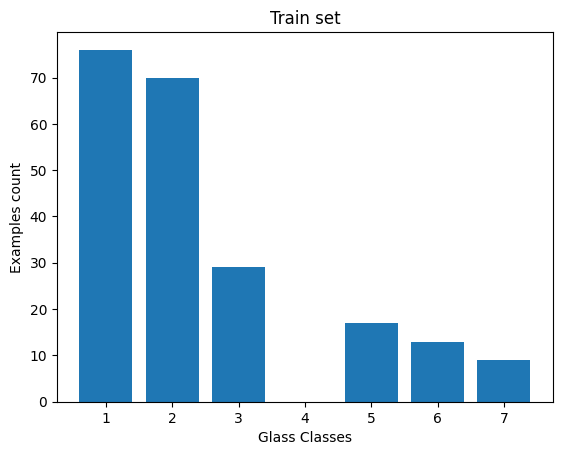

In [106]:
glass_class = Y_train.unique()
values = Y_train.value_counts()
plt.bar(glass_class, values)
plt.title('Train set')
plt.xlabel('Glass Classes')
plt.ylabel('Examples count')
plt.show()

#### Como podemos perceber existem 7 tipos de vidro

In [107]:
Y_train.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

### Análise Exploratória

In [108]:
X_train.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


### Normalizando os dados

In [109]:
X_train = df_train.values
X_train = normalize(X_train)
display(X_train[0])

array([2.06227172e-02, 1.84938864e-01, 6.08779693e-02, 1.49144245e-02,
       9.73233994e-01, 8.13514066e-04, 1.18637468e-01, 0.00000000e+00,
       0.00000000e+00, 1.35585678e-02])

In [110]:
Y_train

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [111]:
Y_train = to_categorical(Y_train)
Y_train.shape

(214, 8)

### Dividindo o conjunto em: 
<ul> 
    <li> 80% para treinamento </li>
    <li> 10% para teste </li>
    <li> 10% para validar </li>
</ul>

In [112]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val, Y_val, test_size=0.5)

#### Criando o modelo

In [113]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, input_shape=(10,), activation='relu'), 
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Dropout(0.3), 

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3), 

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(8, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics=['acc'])
model

In [114]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2816      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 256)               0

#### Treinando o modelo

In [115]:
history = model.fit(X_train, Y_train, epochs=400, validation_data=(X_val, Y_val), verbose=2)

Epoch 1/400
6/6 - 4s - loss: 3.4909 - acc: 0.1053 - val_loss: 2.0818 - val_acc: 0.0000e+00 - 4s/epoch - 661ms/step
Epoch 2/400
6/6 - 0s - loss: 2.9312 - acc: 0.1520 - val_loss: 2.0638 - val_acc: 0.2381 - 164ms/epoch - 27ms/step
Epoch 3/400
6/6 - 0s - loss: 2.8756 - acc: 0.2047 - val_loss: 2.0468 - val_acc: 0.2857 - 102ms/epoch - 17ms/step
Epoch 4/400
6/6 - 0s - loss: 2.1674 - acc: 0.3626 - val_loss: 2.0300 - val_acc: 0.2857 - 166ms/epoch - 28ms/step
Epoch 5/400
6/6 - 0s - loss: 2.1715 - acc: 0.3509 - val_loss: 2.0144 - val_acc: 0.2857 - 200ms/epoch - 33ms/step
Epoch 6/400
6/6 - 0s - loss: 1.8071 - acc: 0.4035 - val_loss: 2.0000 - val_acc: 0.2857 - 110ms/epoch - 18ms/step
Epoch 7/400
6/6 - 0s - loss: 1.5610 - acc: 0.4912 - val_loss: 1.9853 - val_acc: 0.2857 - 102ms/epoch - 17ms/step
Epoch 8/400
6/6 - 0s - loss: 1.6109 - acc: 0.5497 - val_loss: 1.9726 - val_acc: 0.2857 - 156ms/epoch - 26ms/step
Epoch 9/400
6/6 - 0s - loss: 1.4600 - acc: 0.5439 - val_loss: 1.9604 - val_acc: 0.2857 - 169ms

### Avaliando o modelo

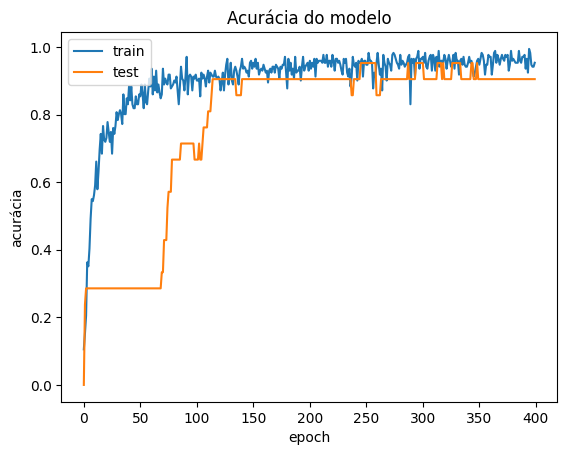

In [116]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Acurácia do modelo")
plt.ylabel('acurácia')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

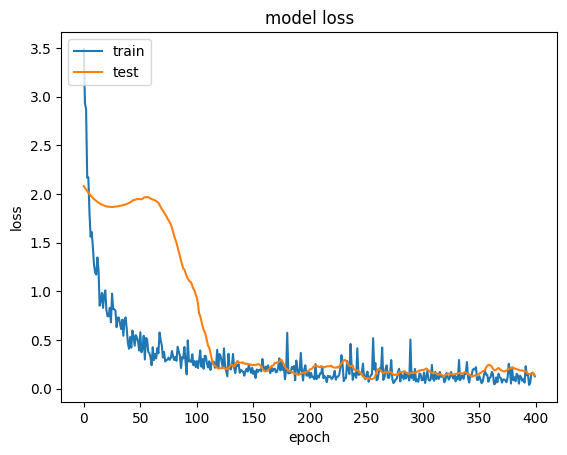

In [117]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Avaliando o modelo para o conjunto de teste

In [118]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 51ms/step - loss: 0.0471 - acc: 0.9545


[0.047052547335624695, 0.9545454382896423]

#### Mostrando a matriz de confusão

In [119]:
Y_pred = model.predict(X_test)
Y_pred_cl = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_test, axis=1)

confusion_matrix(Y_true, Y_pred_cl)

1/1 [==============================] - 0s 236ms/step


array([[ 6,  0,  0,  0,  0],
       [ 0, 10,  0,  0,  0],
       [ 0,  0,  2,  0,  0],
       [ 0,  0,  0,  2,  1],
       [ 0,  0,  0,  0,  1]], dtype=int64)